In [1]:
import pandas as pd 


/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
# Creating a DataFrame to store the Bayesian model results similar to R's write.csv output
model_results = pd.DataFrame({
    "Term": [
        "Intercept", "Pre_Post_Effect", "Building_Effect", "Agent_Effect", "Match", "sEvent_Index_1",
        "sigma", "nu"
    ],
    "Estimate": [0.64, 0.03, -0.02, 0.01, -0.02, -0.07, 0.14, 31.99],
    "Est.Error": [0.01, 0.00, 0.07, 0.00, 0.07, 0.08, 0.00, 5.99],
    "l-95% CI": [0.63, 0.02, -0.16, 0.01, -0.16, -0.23, 0.14, 22.94],
    "u-95% CI": [0.66, 0.03, 0.12, 0.02, 0.11, 0.09, 0.15, 46.05],
    "Rhat": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Bulk_ESS": [3262, 22144, 8024, 17635, 8006, 8400, 9436, 9092],
    "Tail_ESS": [4129, 8060, 7263, 8695, 7088, 8035, 8344, 7387]
})

#
# Provide the file for download
model_df = model_results


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_18397/153421561.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered["Significance"] = (model_df_filtered["l-95% CI"] * model_df_filtered["u-95% CI"] > 0)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_18397/153421561.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered["Significance_Label"] = model_df_filtered["Estimate"].round(2).astype(str)  # Convert estimates to string


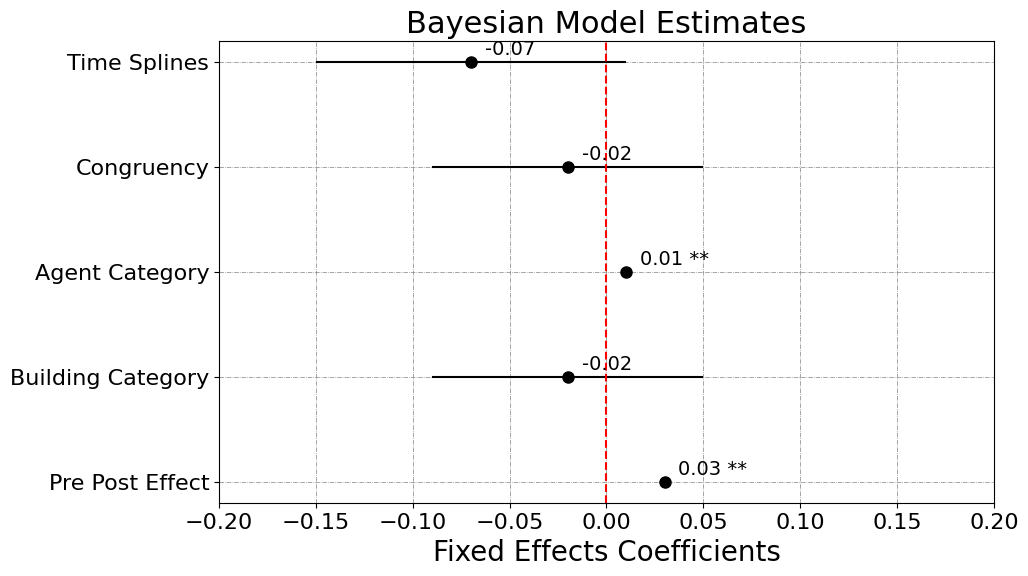

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec



# Increase all font sizes globally
plt.rcParams.update({
    "font.size": 18,  # Base font size for all text
    "axes.titlesize": 22,  # Title font size
    "axes.labelsize": 20,  # Label font size
    "xtick.labelsize": 16,  # X-tick font size
    "ytick.labelsize": 16,  # Y-tick font size
    "legend.fontsize": 16,  # Legend font size
    "figure.titlesize": 24  # Figure title font size
})

# Define the custom labels corresponding to the terms
factor_order = [
    "Time Splines", "Congruency", "Agent Category", "Building Category", "Pre Post Effect", "Intercept"
]

# Create a mapping from original term names to desired labels
label_mapping = {
    "sEvent_Index_1": "Time Splines",
    "Match": "Congruency",
    "Agent_Effect": "Agent Category",
    "Building_Effect": "Building Category",
    "Pre_Post_Effect": "Pre Post Effect",
    "Intercept": "Intercept"  # Will be excluded
}

# Replace term names with corresponding labels
model_df_sorted["Label"] = model_df_sorted["Term"].map(label_mapping)

# Exclude Intercept
model_df_filtered = model_df_sorted[model_df_sorted["Label"] != "Intercept"]

# Ensure the 'Significance' column exists by checking if CI does not cross zero
model_df_filtered["Significance"] = (model_df_filtered["l-95% CI"] * model_df_filtered["u-95% CI"] > 0)

# Define significance labels based on Bayesian "p-value" equivalent
model_df_filtered["Significance_Label"] = model_df_filtered["Estimate"].round(2).astype(str)  # Convert estimates to string
model_df_filtered.loc[model_df_filtered["Significance"], "Significance_Label"] += " **"  # Add ** if significant

# Extract values for plotting
estimates = model_df_filtered["Estimate"]
errors = model_df_filtered["Est.Error"]
terms = model_df_filtered["Label"]
significance_labels = model_df_filtered["Significance_Label"]

# Define y positions
y_positions = np.arange(len(terms))

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot fixed effect coefficients with error bars
ax.errorbar(estimates, y_positions, xerr=errors, fmt="o", color="black", markersize=8, label="Bayesian Estimates")

# Add annotations for estimates with significance labels
for estimate, y, label in zip(estimates, y_positions, significance_labels):
    ax.annotate(label, (estimate, y), textcoords="offset points", xytext=(10, 5), ha='left', fontsize=14)

# Add reference line at zero
ax.axvline(x=0, color="red", linestyle="dashed")

# Set labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(terms)  # Custom factor labels
ax.set_xlabel("Fixed Effects Coefficients")
ax.set_title("Bayesian Model Estimates")

# Add grid
ax.grid(True, color="grey", linewidth=0.5, linestyle="-.")
# Set x-axis limits to range from -0.20 to 0.10
ax.set_xlim(-0.20, 0.20)

# Show the updated plot
plt.show()





In [14]:
model_df

,Term,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
0,sEvent_Index_1,-0.07,0.08,-0.23,0.09,1.0,8400,8035
1,Match,-0.02,0.07,-0.16,0.11,1.0,8006,7088
2,Agent_Effect,0.01,0.00,0.01,0.02,1.0,17635,8695
3,Building_Effect,-0.02,0.07,-0.16,0.12,1.0,8024,7263
4,Pre_Post_Effect,0.03,0.00,0.02,0.03,1.0,22144,8060
5,Intercept,0.64,0.01,0.63,0.66,1.0,3262,4129


In [ ]:
factor_order = [
    "Time Splines", "Congruency", "Agent Category", "Building Category", "Pre Post Effect", "Intercept"
]